# Analyzing the Photoelectric Effect
> February 2021<br>
> MSU Denver<br>
> Junior Lab <br>
> Benjamin Jiron<br>
> Dr. Richard Krantz

Right off the bat we start off by importing Pandas to read our CSV files and put them into dataframes, and Matplotlib for plotting.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Reading in The Data
The CSV files we're importing contains photocurrent vs stopping voltage data.<br>
Just so we don't have to do any more imports let's right away store ALL the CSV files into a list in which each entry is just one of our dataframes.

In [2]:
columns = ['Voltage', 'Amperes']
df = [
    pd.read_csv('PhotoelectricEffect_Data/365nm.csv', names=columns, header=None),
    pd.read_csv('PhotoelectricEffect_Data/405nm.csv', names=columns, header=None),
    pd.read_csv('PhotoelectricEffect_Data/436nm.csv', names=columns, header=None),
    pd.read_csv('PhotoelectricEffect_Data/486nm.csv', names=columns, header=None),
    pd.read_csv('PhotoelectricEffect_Data/546nm.csv', names=columns, header=None),
    pd.read_csv('PhotoelectricEffect_Data/577nm.csv', names=columns, header=None),
    pd.read_csv('PhotoelectricEffect_Data/589nm.csv', names=columns, header=None),
    pd.read_csv('PhotoelectricEffect_Data/656nm.csv', names=columns, header=None),
]

Let's get a big-picture overview of what the data looks like:

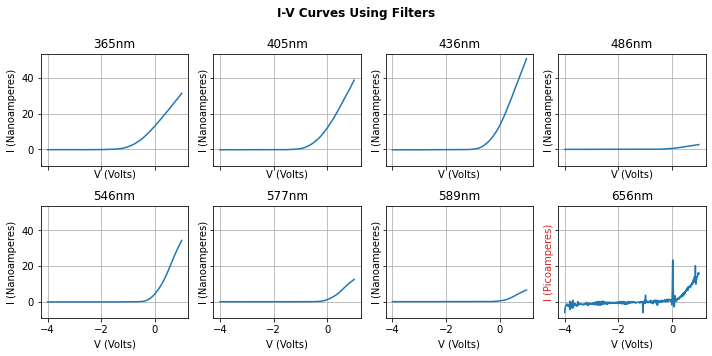

In [3]:
# Let's just get an overview of the data
fig, axes = plt.subplots(2, 4, figsize=(10, 5), sharey=True, sharex=True)
axes[0, 0].plot(df[0].loc[:, 'Voltage'], df[0].loc[:, 'Amperes']*10**9)
axes[0, 0].set_title('365nm')
axes[0, 1].plot(df[1].loc[:, 'Voltage'], df[1].loc[:, 'Amperes']*10**9)
axes[0, 1].set_title('405nm')
axes[0, 2].plot(df[2].loc[:, 'Voltage'], df[2].loc[:, 'Amperes']*10**9)
axes[0, 2].set_title('436nm')
axes[0, 3].plot(df[3].loc[:, 'Voltage'], df[3].loc[:, 'Amperes']*10**9)
axes[0, 3].set_title('486nm')
axes[1, 0].plot(df[4].loc[:, 'Voltage'], df[4].loc[:, 'Amperes']*10**9)
axes[1, 0].set_title('546nm')
axes[1, 1].plot(df[5].loc[:, 'Voltage'], df[5].loc[:, 'Amperes']*10**9)
axes[1, 1].set_title('577nm')
axes[1, 2].plot(df[6].loc[:, 'Voltage'], df[6].loc[:, 'Amperes']*10**9)
axes[1, 2].set_title('589nm')
axes[1, 3].plot(df[7].loc[:, 'Voltage'], df[7].loc[:, 'Amperes']*10**12)
axes[1, 3].set_title('656nm')
for row in axes:
    for ax in row:
        ax.set_xlabel('V (Volts)')
        ax.set_ylabel('I (Nanoamperes)')
        ax.grid()
axes[1, 3].set_ylabel('I (Picoamperes)', color='tab:red')
fig.suptitle('I-V Curves Using Filters', fontweight='bold')
fig.tight_layout()
fig.subplots_adjust(top=.85)

# I. Analyzing the Data

Looking at just the first filter (365 nm):

In [4]:
V = df[0].loc[:, 'Voltage']
I = df[0].loc[:, 'Amperes'] * 10**12 # scaling to picoamps

<p>Let's just look at the first little bit to see where it crosses 0.</p>

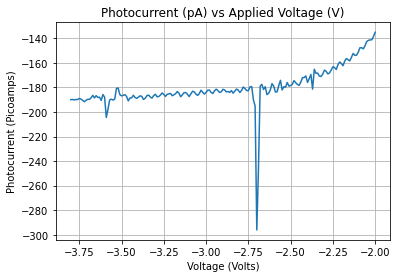

In [5]:
start, stop = 20, 200
plt.plot(V[start:stop+1], I[start:stop+1])
plt.title('Photocurrent (pA) vs Applied Voltage (V)')
plt.xlabel('Voltage (Volts)')
plt.ylabel('Photocurrent (Picoamps)')
plt.grid()

<p>The data appears to be more-or-less linear between -3.45 and -2.8 Volts.</p>

In [6]:
subdf = df[0].loc[(-3.45 <= df[0]['Voltage']) & (df[0]['Voltage'] <= -2.8)]
V = subdf.loc[:, 'Voltage']
I = subdf.loc[:, 'Amperes'] * 10**12

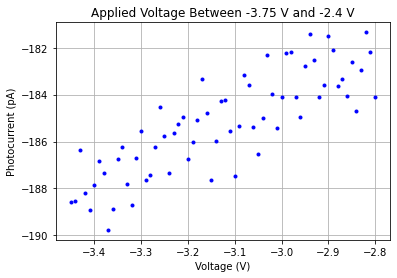

In [7]:
plt.plot(V, I, 'b.')
plt.title('Applied Voltage Between -3.75 V and -2.4 V')
plt.xlabel('Voltage (V)')
plt.ylabel('Photocurrent (pA)')
plt.grid()

<p>Let's fit a line to this limited range of reverse current data.</p>
<p>We will use a curve-fitting function from the scipy library:</p>

In [8]:
from scipy.optimize import curve_fit
import numpy as np

def linfunc(x, m, b):
    return m*x + b

popt, pcov = curve_fit(f=linfunc, xdata=V, ydata=I)
# popt is an array => (slope, intercept)
# pcov => (uncertainty in slope, uncertainty in intercept)
DEL = np.sqrt(np.diag(pcov))
print(f'Slope: {popt[0]} pA/V\nIntercept: {popt[1]} V')
print(f'Uncertainty in slope: \u00b1{DEL[0]} pA/V\nUncertainty in intercept: \u00b1{DEL[1]} pA')

Slope: 9.227280842919356 pA/V
Intercept: -156.37915645678578 V
Uncertainty in slope: ±0.7756600158322695 pA/V
Uncertainty in intercept: ±2.4284374026829565 pA


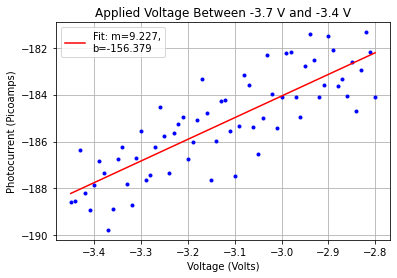

In [9]:
plt.plot(V, I, 'b.')
plt.plot(V, linfunc(V, *popt), 'r-', 
         label=f'Fit: m={round(popt[0], 3)},\nb={round(popt[1], 3)}')
plt.title('Applied Voltage Between -3.7 V and -3.4 V')
plt.xlabel('Voltage (Volts)')
plt.ylabel('Photocurrent (Picoamps)')
plt.legend()
plt.grid()

<p>We know where the curve goes to zero so let's isolate that:</p>

Text(0.06, 0.5, 'Reverse Photocurrent (Picoamps)')

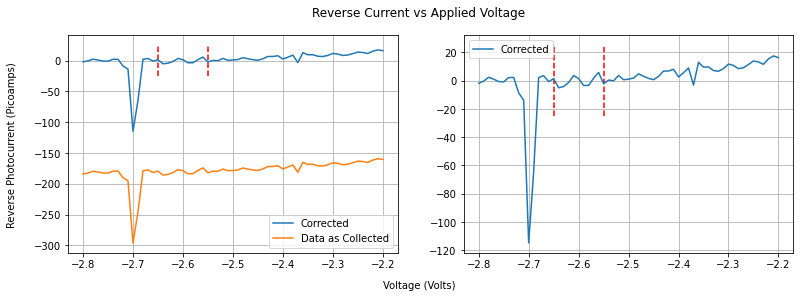

In [10]:
subdf = df[0].loc[(-2.8 <= df[0]['Voltage']) & (df[0]['Voltage'] <= -2.2)]
V = subdf.loc[:, 'Voltage']
I = subdf.loc[:, 'Amperes'] * 10**12
m, b = popt
I_corrected = I - (m*V + b)
fig, ax = plt.subplots(1, 2, figsize=(13,4))
ax[0].plot(V, I_corrected, label='Corrected')
ax[0].plot(V, I, label='Data as Collected')
ax[0].vlines(x=[-2.65, -2.55], ymin=-25, ymax=25, colors='red', linestyles='dashed')
ax[0].grid()
ax[0].legend()
ax[1].plot(V, I_corrected, label='Corrected')
ax[1].vlines(x=[-2.65, -2.55], ymin=-25, ymax=25, colors='red', linestyles='dashed')
ax[1].grid()
ax[1].legend()
fig.suptitle('Reverse Current vs Applied Voltage')
fig.text(0.5, 0.00, 'Voltage (Volts)', ha='center')
fig.text(0.06, 0.5, 'Reverse Photocurrent (Picoamps)', va='center', rotation='vertical')

<p>This rectified current is consistently above zero for V greater than about -2.65 Volts and fluctuates around zero for V less than about -2.55 Volts. The stopping potential might be estimated to be -2.6 $\pm$ .05 Volts.</p>

### <i>Potential (365nm): -2.60 $\pm$ .05 V</i>
$\rightarrow$ Optionally skip the next seven filters and go to [The Einstein Relation](#einstein-relation)

## The Other Filters

### 405nm
General overview:

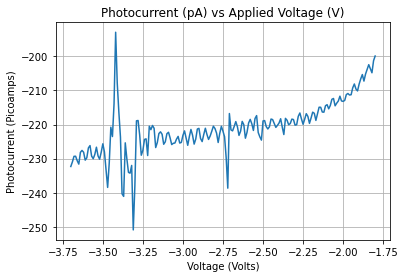

In [11]:
cur_df = df[1]
V = cur_df.loc[:, 'Voltage']
I = cur_df.loc[:, 'Amperes'] * 10**12 # scaling to picoamps
start, stop = 30, 220
plt.plot(V[start:stop+1], I[start:stop+1])
plt.title('Photocurrent (pA) vs Applied Voltage (V)')
plt.xlabel('Voltage (Volts)')
plt.ylabel('Photocurrent (Picoamps)')
plt.grid()

Zooming in on -3.2 < V < -2.3:

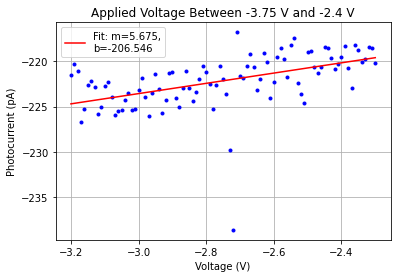

In [12]:
subdf = cur_df.loc[(-3.2 <= cur_df['Voltage']) & (cur_df['Voltage'] <= -2.3)]
V = subdf.loc[:, 'Voltage']
I = subdf.loc[:, 'Amperes'] * 10**12
popt, pcov = curve_fit(f=linfunc, xdata=V, ydata=I)

plt.plot(V, I, 'b.')
plt.plot(V, linfunc(V, *popt), 'r-', 
         label=f'Fit: m={round(popt[0], 3)},\nb={round(popt[1], 3)}')
plt.title('Applied Voltage Between -3.75 V and -2.4 V')
plt.xlabel('Voltage (V)')
plt.ylabel('Photocurrent (pA)')
plt.legend()
plt.grid()

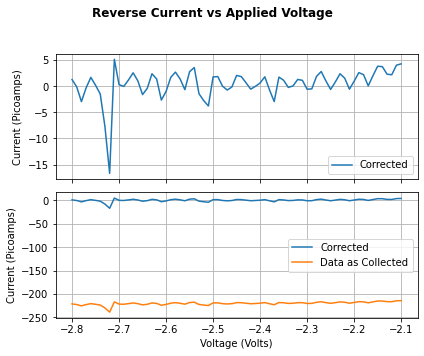

In [13]:
subdf = cur_df.loc[(-2.8 <= cur_df['Voltage']) & (cur_df['Voltage'] <= -2.1)]
V = subdf.loc[:, 'Voltage']
I = subdf.loc[:, 'Amperes'] * 10**12
m, b = popt
I_corrected = I - (m*V + b)
fig, ax = plt.subplots(2, figsize=(6,5), sharex=True)
ax[0].plot(V, I_corrected, label='Corrected')
ax[1].plot(V, I_corrected, label='Corrected')
ax[1].plot(V, I, label='Data as Collected')
plt.suptitle('Reverse Current vs Applied Voltage', fontweight='bold')
plt.xlabel('Voltage (Volts)')
plt.ylabel('Reverse Photocurrent')
plt.tight_layout()
plt.subplots_adjust(top=.85)
for x in ax:
    x.set_ylabel('Current (Picoamps)')
    x.grid()
    x.legend()

### <i>Potential (405nm): -2.35 $\pm$ .05 V</i>
$\rightarrow$ Go to [The Einstein Relation](#einstein-relation)

### 436nm
General overview:

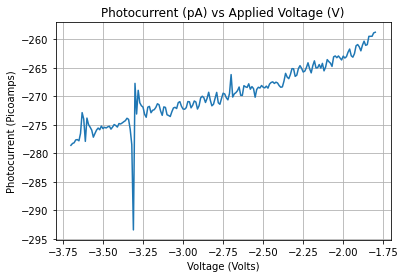

In [14]:
cur_df = df[2]
V = cur_df.loc[:, 'Voltage']
I = cur_df.loc[:, 'Amperes'] * 10**12 # scaling to picoamps
start, stop = 30, 220
plt.plot(V[start:stop+1], I[start:stop+1])
plt.title('Photocurrent (pA) vs Applied Voltage (V)')
plt.xlabel('Voltage (Volts)')
plt.ylabel('Photocurrent (Picoamps)')
plt.grid()

Zooming in on -3.20 $<=$ V < 2.25:

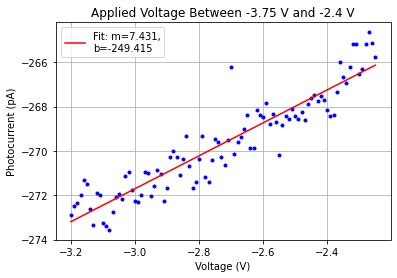

In [15]:
subdf = cur_df.loc[(-3.2 <= cur_df['Voltage']) & (cur_df['Voltage'] <= -2.25)]
V = subdf.loc[:, 'Voltage']
I = subdf.loc[:, 'Amperes'] * 10**12
popt, pcov = curve_fit(f=linfunc, xdata=V, ydata=I)

plt.plot(V, I, 'b.')
plt.plot(V, linfunc(V, *popt), 'r-', 
         label=f'Fit: m={round(popt[0], 3)},\nb={round(popt[1], 3)}')
plt.title('Applied Voltage Between -3.75 V and -2.4 V')
plt.xlabel('Voltage (V)')
plt.ylabel('Photocurrent (pA)')
plt.legend()
plt.grid()

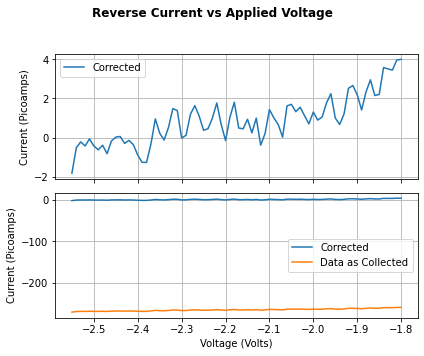

In [16]:
subdf = cur_df.loc[(-2.55 <= cur_df['Voltage']) & (cur_df['Voltage'] <= -1.8)]
V = subdf.loc[:, 'Voltage']
I = subdf.loc[:, 'Amperes'] * 10**12
m, b = popt
I_corrected = I - (m*V + b)
fig, ax = plt.subplots(2, figsize=(6,5), sharex=True)
ax[0].plot(V, I_corrected, label='Corrected')
ax[1].plot(V, I_corrected, label='Corrected')
ax[1].plot(V, I, label='Data as Collected')
plt.suptitle('Reverse Current vs Applied Voltage', fontweight='bold')
plt.xlabel('Voltage (Volts)')
plt.ylabel('Reverse Photocurrent')
plt.tight_layout()
plt.subplots_adjust(top=.85)
for x in ax:
    x.set_ylabel('Current (Picoamps)')
    x.grid()
    x.legend()

### <i>Potential (436nm): -2.15 $\pm$ .05V</i>
$\rightarrow$ Go to [The Einstein Relation](#einstein-relation)

### 486nm
General overview:

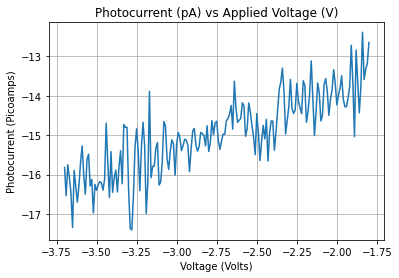

In [17]:
cur_df = df[3]
V = cur_df.loc[:, 'Voltage']
I = cur_df.loc[:, 'Amperes'] * 10**12 # scaling to picoamps
start, stop = 30, 220
plt.plot(V[start:stop+1], I[start:stop+1])
plt.title('Photocurrent (pA) vs Applied Voltage (V)')
plt.xlabel('Voltage (Volts)')
plt.ylabel('Photocurrent (Picoamps)')
plt.grid()

Zooming in on -3.7 < V < -2.75:

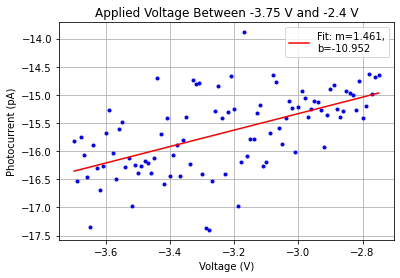

In [18]:
subdf = cur_df.loc[(-3.7 <= cur_df['Voltage']) & (cur_df['Voltage'] <= -2.75)]
V = subdf.loc[:, 'Voltage']
I = subdf.loc[:, 'Amperes'] * 10**12
popt, pcov = curve_fit(f=linfunc, xdata=V, ydata=I)

plt.plot(V, I, 'b.')
plt.plot(V, linfunc(V, *popt), 'r-', 
         label=f'Fit: m={round(popt[0], 3)},\nb={round(popt[1], 3)}')
plt.title('Applied Voltage Between -3.75 V and -2.4 V')
plt.xlabel('Voltage (V)')
plt.ylabel('Photocurrent (pA)')
plt.legend()
plt.grid()

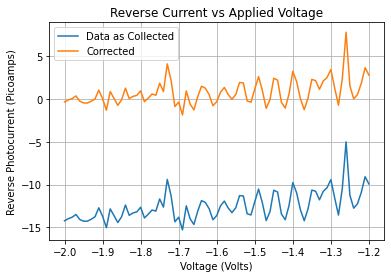

In [19]:
subdf = cur_df.loc[(-2.0<= cur_df['Voltage']) & (cur_df['Voltage'] <= -1.2)]
V = subdf.loc[:, 'Voltage']
I = subdf.loc[:, 'Amperes'] * 10**12
m, b = popt
I_corrected = I - (m*V + b)
plt.plot(V, I, label='Data as Collected')
plt.plot(V, I_corrected, label='Corrected')
plt.title('Reverse Current vs Applied Voltage')
plt.xlabel('Voltage (Volts)')
plt.ylabel('Reverse Photocurrent (Picoamps)')
plt.legend()
plt.grid()

### Potential (486 nm): V =  -1.75 $\pm$ .05 V
$\rightarrow$ Go to [The Einstein Relation](#einstein-relation)

### 546 nm
General Overview:

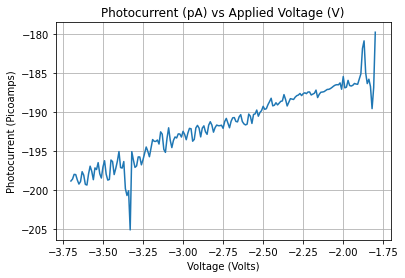

In [20]:
cur_df = df[4]
V = cur_df.loc[:, 'Voltage']
I = cur_df.loc[:, 'Amperes'] * 10**12 # scaling to picoamps
start, stop = 30, 220
plt.plot(V[start:stop+1], I[start:stop+1])
plt.title('Photocurrent (pA) vs Applied Voltage (V)')
plt.xlabel('Voltage (Volts)')
plt.ylabel('Photocurrent (Picoamps)')
plt.grid()

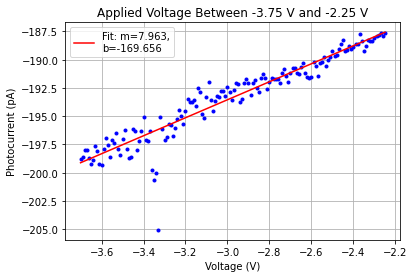

In [21]:
subdf = cur_df.loc[(-3.7 <= cur_df['Voltage']) & (cur_df['Voltage'] <= -2.25)]
V = subdf.loc[:, 'Voltage']
I = subdf.loc[:, 'Amperes'] * 10**12
popt, pcov = curve_fit(f=linfunc, xdata=V, ydata=I)

plt.plot(V, I, 'b.')
plt.plot(V, linfunc(V, *popt), 'r-', 
         label=f'Fit: m={round(popt[0], 3)},\nb={round(popt[1], 3)}')
plt.title('Applied Voltage Between -3.75 V and -2.25 V')
plt.xlabel('Voltage (V)')
plt.ylabel('Photocurrent (pA)')
plt.legend()
plt.grid()

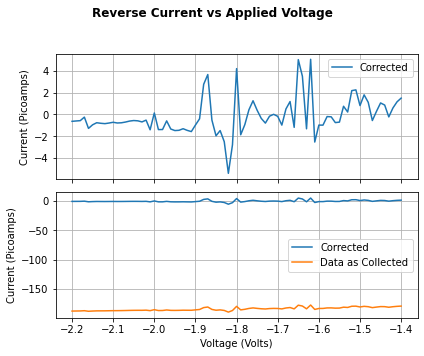

In [22]:
subdf = cur_df.loc[(-2.2 <= cur_df['Voltage']) & (cur_df['Voltage'] <= -1.4)]
V = subdf.loc[:, 'Voltage']
I = subdf.loc[:, 'Amperes'] * 10**12
m, b = popt
I_corrected = I - (m*V + b)
fig, ax = plt.subplots(2, figsize=(6,5), sharex=True)
ax[0].plot(V, I_corrected, label='Corrected')
ax[1].plot(V, I_corrected, label='Corrected')
ax[1].plot(V, I, label='Data as Collected')
plt.suptitle('Reverse Current vs Applied Voltage', fontweight='bold')
plt.xlabel('Voltage (Volts)')
plt.ylabel('Reverse Photocurrent')
plt.tight_layout()
plt.subplots_adjust(top=.85)
for x in ax:
    x.set_ylabel('Current (Picoamps)')
    x.grid()
    x.legend()

### Potential (546 nm): V =  -1.50 $\pm$ .05 V
$\rightarrow$ Go to [The Einstein Relation](#einstein-relation)

### 577 nm
General Overview:

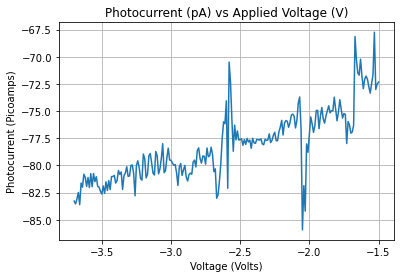

In [23]:
cur_df = df[5]
V = cur_df.loc[:, 'Voltage']
I = cur_df.loc[:, 'Amperes'] * 10**12 # scaling to picoamps
start, stop = 30, 250
plt.plot(V[start:stop+1], I[start:stop+1])
plt.title('Photocurrent (pA) vs Applied Voltage (V)')
plt.xlabel('Voltage (Volts)')
plt.ylabel('Photocurrent (Picoamps)')
plt.grid()

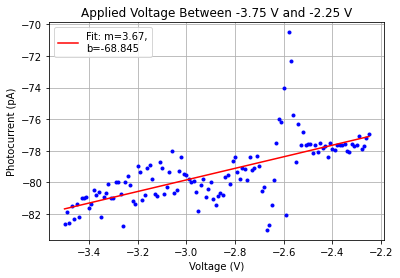

In [24]:
subdf = cur_df.loc[(-3.5 <= cur_df['Voltage']) & (cur_df['Voltage'] <= -2.25)]
V = subdf.loc[:, 'Voltage']
I = subdf.loc[:, 'Amperes'] * 10**12
popt, pcov = curve_fit(f=linfunc, xdata=V, ydata=I)

plt.plot(V, I, 'b.')
plt.plot(V, linfunc(V, *popt), 'r-', 
         label=f'Fit: m={round(popt[0], 3)},\nb={round(popt[1], 3)}')
plt.title('Applied Voltage Between -3.75 V and -2.25 V')
plt.xlabel('Voltage (V)')
plt.ylabel('Photocurrent (pA)')
plt.legend()
plt.grid()

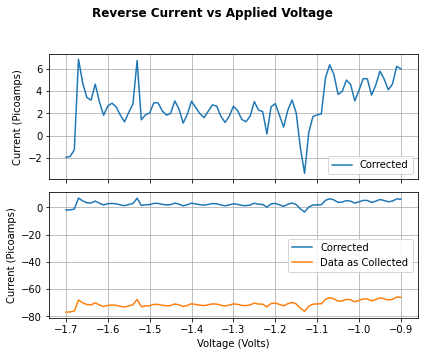

In [25]:
subdf = cur_df.loc[(-1.7 <= cur_df['Voltage']) & (cur_df['Voltage'] <= -.9)]
V = subdf.loc[:, 'Voltage']
I = subdf.loc[:, 'Amperes'] * 10**12
m, b = popt
I_corrected = I - (m*V + b)
fig, ax = plt.subplots(2, figsize=(6,5), sharex=True)
ax[0].plot(V, I_corrected, label='Corrected')
ax[1].plot(V, I_corrected, label='Corrected')
ax[1].plot(V, I, label='Data as Collected')
plt.suptitle('Reverse Current vs Applied Voltage', fontweight='bold')
plt.xlabel('Voltage (Volts)')
plt.ylabel('Reverse Photocurrent')
plt.tight_layout()
plt.subplots_adjust(top=.85)
for x in ax:
    x.set_ylabel('Current (Picoamps)')
    x.grid()
    x.legend()

### Potential (577 nm): V =  -1.40 $\pm$ .05 V
$\rightarrow$ Go to [The Einstein Relation](#einstein-relation)

### 589 nm
General Overview:

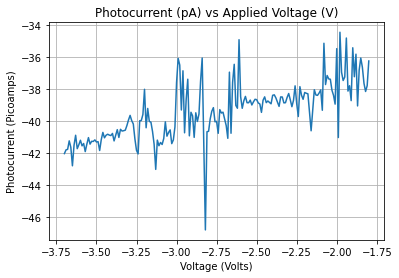

In [26]:
cur_df = df[6]
V = cur_df.loc[:, 'Voltage']
I = cur_df.loc[:, 'Amperes'] * 10**12 # scaling to picoamps
start, stop = 30, 220
plt.plot(V[start:stop+1], I[start:stop+1])
plt.title('Photocurrent (pA) vs Applied Voltage (V)')
plt.xlabel('Voltage (Volts)')
plt.ylabel('Photocurrent (Picoamps)')
plt.grid()

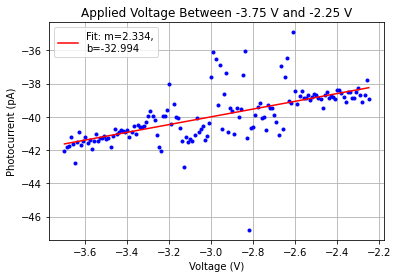

In [27]:
subdf = cur_df.loc[(-3.7 <= cur_df['Voltage']) & (cur_df['Voltage'] <= -2.25)]
V = subdf.loc[:, 'Voltage']
I = subdf.loc[:, 'Amperes'] * 10**12
popt, pcov = curve_fit(f=linfunc, xdata=V, ydata=I)

plt.plot(V, I, 'b.')
plt.plot(V, linfunc(V, *popt), 'r-', 
         label=f'Fit: m={round(popt[0], 3)},\nb={round(popt[1], 3)}')
plt.title('Applied Voltage Between -3.75 V and -2.25 V')
plt.xlabel('Voltage (V)')
plt.ylabel('Photocurrent (pA)')
plt.legend()
plt.grid()

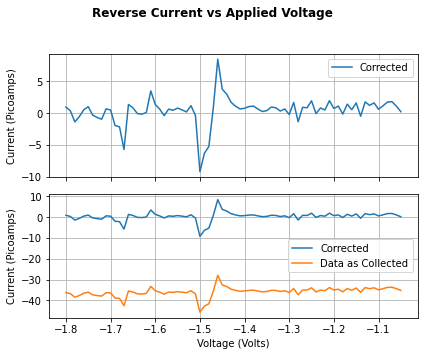

In [28]:
subdf = cur_df.loc[(-1.8 <= cur_df['Voltage']) & (cur_df['Voltage'] <= -1.05)]
V = subdf.loc[:, 'Voltage']
I = subdf.loc[:, 'Amperes'] * 10**12
m, b = popt
I_corrected = I - (m*V + b)
fig, ax = plt.subplots(2, figsize=(6,5), sharex=True)
ax[0].plot(V, I_corrected, label='Corrected')
ax[1].plot(V, I_corrected, label='Corrected')
ax[1].plot(V, I, label='Data as Collected')
plt.suptitle('Reverse Current vs Applied Voltage', fontweight='bold')
plt.xlabel('Voltage (Volts)')
plt.ylabel('Reverse Photocurrent')
plt.tight_layout()
plt.subplots_adjust(top=.85)
for x in ax:
    x.set_ylabel('Current (Picoamps)')
    x.grid()
    x.legend()

### Potential (589 nm): V =  -1.3 $\pm$ .05 V
$\rightarrow$ Go to [The Einstein Relation](#einstein-relation)

### 656 nm
General Overview:

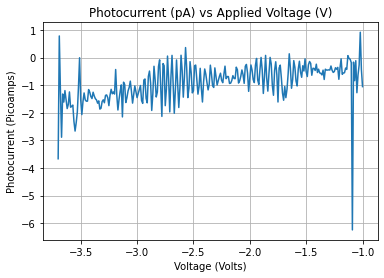

In [29]:
cur_df = df[7]
V = cur_df.loc[:, 'Voltage']
I = cur_df.loc[:, 'Amperes'] * 10**12 # scaling to picoamps
start, stop = 30, 300
plt.plot(V[start:stop+1], I[start:stop+1])
plt.title('Photocurrent (pA) vs Applied Voltage (V)')
plt.xlabel('Voltage (Volts)')
plt.ylabel('Photocurrent (Picoamps)')
plt.grid()

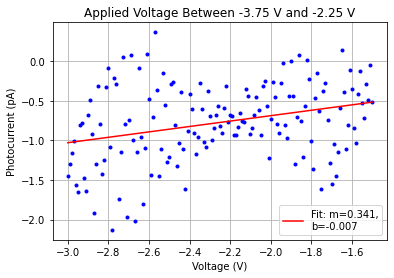

In [30]:
subdf = cur_df.loc[(-3.0 <= cur_df['Voltage']) & (cur_df['Voltage'] <= -1.5)]
V = subdf.loc[:, 'Voltage']
I = subdf.loc[:, 'Amperes'] * 10**12
popt, pcov = curve_fit(f=linfunc, xdata=V, ydata=I)

plt.plot(V, I, 'b.')
plt.plot(V, linfunc(V, *popt), 'r-', 
         label=f'Fit: m={round(popt[0], 3)},\nb={round(popt[1], 3)}')
plt.title('Applied Voltage Between -3.75 V and -2.25 V')
plt.xlabel('Voltage (V)')
plt.ylabel('Photocurrent (pA)')
plt.legend()
plt.grid()

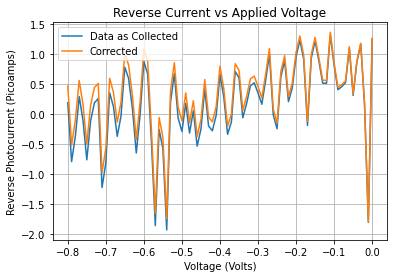

In [31]:
subdf = cur_df.loc[(-.8 <= cur_df['Voltage']) & (cur_df['Voltage'] <= 0.0)]
V = subdf.loc[:, 'Voltage']
I = subdf.loc[:, 'Amperes'] * 10**12
m, b = popt
I_corrected = I - (m*V + b)
plt.plot(V, I, label='Data as Collected')
plt.plot(V, I_corrected, label='Corrected')
plt.title('Reverse Current vs Applied Voltage')
plt.xlabel('Voltage (Volts)')
plt.ylabel('Reverse Photocurrent (Picoamps)')
plt.legend()
plt.grid()

### Potential (656 nm): V =  -0.60 $\pm$ .05 V

$\rightarrow$ This is quite an outlier! The data here is a little too noisy - let's just ignore this data.

<div id="einstein-relation">
    <h1>II. The Einstein Relation</h1>
    Stopping potential is linear in the frequency of the light illuminating the photocathode.
</div>

In [32]:
# Potentials from data:
V = [-2.6, -2.35, -2.15, -1.8, -1.5, -1.4, -1.3]
V_abs = np.array([abs(v) for v in V])
# Wavelengths from data:
wavelengths = [365, 405, 436, 486, 546, 577, 589] # nm
# speed_of_light = wavelength*frequency
freq = np.array([299_792_458e9 / w for w in wavelengths]) # nm converted to m

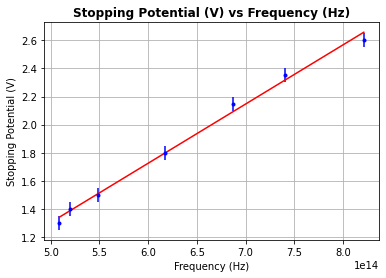

In [33]:
plt.title("Stopping Potential (V) vs Frequency (Hz)", fontweight='bold')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Stopping Potential (V)")
plt.errorbar(freq, V_abs, fmt='b.', xerr=0.0, yerr=0.05)
popt, pcov = curve_fit(f=linfunc, xdata=freq, ydata=V_abs)
plt.plot(freq, linfunc(freq, *popt), 'r')
plt.grid()

## The ratio of Planck's constant, <math>h</math>, to the charge of the electron, <math>e</math>:

In [34]:
# h/e
popt[0]

4.2163063488930325e-15

## Accepted value of <math>h/e</math>: 4.136e-15 Vs
Error on the order of ~ 1-2%

In [35]:
1 - 4.136 / (popt[0]*10**15)

0.019046611476444597